In [2]:
import numpy as np
import pandas as pd
import sys
import os
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sys.path.append('..')
from helper import *

setwd()


In [4]:
con = duckdb.connect(database="data/exploitation.db", read_only=True)
df = con.execute("SELECT * FROM sandbox_T_apartment_S_ca_preprocessed").fetchdf()
con.close

<bound method PyCapsule.close of <duckdb.DuckDBPyConnection object at 0x7f6deeb436b0>>

In [5]:
y_col = 'price'
# split training set and test set and validation set
df_train, df_val, df_test = np.split(
    df.sample(frac=1, random_state=777),
    [ int(0.6*len(df)) , int(0.8*len(df)) ]
    )

df_train2, df_val2, df_test2 = np.split(
    df.sample(frac=1, random_state=777),
    [ int(0.6*len(df)) , int(0.8*len(df)) ]
    )



In [6]:
numeric_description(df_train)

,mean,std,min,25%,50%,75%,max,missings,missing ratio (%)
price,7.430379,0.370279,5.736572,7.186144,7.424165,7.673688,8.590630,0.0,0.0
sqfeet,6.743327,0.288882,5.505332,6.552508,6.758095,6.938284,7.715787,0.0,0.0
beds,1.649876,0.744533,0.000000,1.000000,2.000000,2.000000,4.000000,0.0,0.0
baths,1.426509,0.509364,0.693842,1.000000,1.000000,2.000000,3.000000,0.0,0.0
lat,35.912215,2.119039,32.349600,34.035300,35.441800,37.788275,45.534300,0.0,0.0
long,-119.472516,1.785567,-124.203000,-121.269000,-119.652000,-117.915000,-78.408500,0.0,0.0
num_hospitals,1316.648706,1838.401530,0.000000,159.750000,609.000000,1782.000000,13910.000000,0.0,0.0
num_beds,11.329084,1.654426,5.864527,10.284558,11.550048,12.587604,14.481004,0.0,0.0
hospital_type_general,5.892373,1.622349,1.014521,4.795791,6.077642,7.118016,8.884195,0.0,0.0
hospital_type_critical,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [7]:
numeric_description(df_val)

,mean,std,min,25%,50%,75%,max,missings,missing ratio (%)
price,7.427305,0.367970,5.736572,7.186144,7.424165,7.657283,8.583730,0.0,0.0
sqfeet,6.746394,0.282725,5.505332,6.556778,6.758095,6.942157,7.596807,0.0,0.0
beds,1.655514,0.735404,0.000000,1.000000,2.000000,2.000000,4.000000,0.0,0.0
baths,1.435052,0.508842,0.647480,1.000000,1.000000,2.000000,3.000000,0.0,0.0
lat,35.921527,2.120112,32.517500,34.035300,35.463600,37.799800,42.199700,0.0,0.0
long,-119.487496,1.730539,-124.202000,-121.268000,-119.652000,-117.908000,-115.200000,0.0,0.0
num_hospitals,1275.200672,1764.317465,0.000000,165.000000,600.000000,1738.000000,13910.000000,0.0,0.0
num_beds,11.323250,1.625279,6.306275,10.262106,11.516728,12.553601,14.481004,0.0,0.0
hospital_type_general,5.895408,1.583749,1.025137,4.844187,6.070738,7.077498,8.884195,0.0,0.0
hospital_type_critical,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [8]:
numeric_description(df_test)

,mean,std,min,25%,50%,75%,max,missings,missing ratio (%)
price,7.428165,0.368293,5.736572,7.182352,7.424464,7.670895,8.589700,0.0,0.0
sqfeet,6.741138,0.290533,5.505332,6.552508,6.755769,6.935370,7.770440,0.0,0.0
beds,1.644885,0.740893,0.000000,1.000000,2.000000,2.000000,4.000000,0.0,0.0
baths,1.429166,0.509440,0.555518,1.000000,1.000000,2.000000,3.000000,0.0,0.0
lat,35.865632,2.130228,32.507800,33.981150,35.403200,37.774000,42.471300,0.0,0.0
long,-119.427663,1.971895,-124.184000,-121.269750,-119.344000,-117.871250,-72.371800,0.0,0.0
num_hospitals,1308.175812,1813.751525,0.000000,165.000000,584.000000,1776.000000,13910.000000,0.0,0.0
num_beds,11.331269,1.656190,6.306275,10.313476,11.505427,12.561342,14.481004,0.0,0.0
hospital_type_general,5.890969,1.624024,1.014645,4.844187,6.063785,7.114959,8.884195,0.0,0.0
hospital_type_critical,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [11]:
description_categorical(df_train)

,,#Levels,"Max Freq (Abs,%)","Min Freq (Abs,%)",#Unknows,Unknows (%)
0,region,29,"stockton (1419, 8.83)","susanville (3, 0.02)",0,0.00
1,type,1,"apartment (16072, 100.0)","apartment (16072, 100.0)",0,0.00
2,cats_allowed,2,"Yes (11736, 73.02)","No (4336, 26.98)",0,0.00
3,dogs_allowed,2,"Yes (11223, 69.83)","No (4849, 30.17)",0,0.00
4,smoking_allowed,2,"Yes (11733, 73.0)","No (4339, 27.0)",0,0.00
5,wheelchair_access,2,"No (14453, 89.93)","Yes (1619, 10.07)",0,0.00
6,electric_vehicle_charge,2,"No (15245, 94.85)","Yes (827, 5.15)",0,0.00
7,comes_furnished,2,"No (15729, 97.87)","Yes (343, 2.13)",0,0.00
8,laundry_options,6,"w/d in unit (6994, 43.52)","no laundry on site (90, 0.56)",2530,15.74
9,parking_options,8,"carport (7144, 44.45)","valet parking (11, 0.07)",4488,27.92


In [10]:
description_categorical(df_val)

,,#Levels,"Max Freq (Abs,%)","Min Freq (Abs,%)",#Unknows,Unknows (%)
0,region,29,"stockton (503, 9.39)","susanville (2, 0.04)",0,0.00
1,type,1,"apartment (5357, 100.0)","apartment (5357, 100.0)",0,0.00
2,cats_allowed,2,"Yes (3938, 73.51)","No (1419, 26.49)",0,0.00
3,dogs_allowed,2,"Yes (3781, 70.58)","No (1576, 29.42)",0,0.00
4,smoking_allowed,2,"Yes (3934, 73.44)","No (1423, 26.56)",0,0.00
5,wheelchair_access,2,"No (4853, 90.59)","Yes (504, 9.41)",0,0.00
6,electric_vehicle_charge,2,"No (5086, 94.94)","Yes (271, 5.06)",0,0.00
7,comes_furnished,2,"No (5260, 98.19)","Yes (97, 1.81)",0,0.00
8,laundry_options,6,"w/d in unit (2340, 43.68)","no laundry on site (27, 0.5)",793,14.80
9,parking_options,8,"carport (2418, 45.14)","valet parking (4, 0.07)",1449,27.05


In [9]:
description_categorical(df_test)

,,#Levels,"Max Freq (Abs,%)","Min Freq (Abs,%)",#Unknows,Unknows (%)
0,region,29,"inland empire (474, 8.85)","susanville (1, 0.02)",0,0.00
1,type,1,"apartment (5358, 100.0)","apartment (5358, 100.0)",0,0.00
2,cats_allowed,2,"Yes (3937, 73.48)","No (1421, 26.52)",0,0.00
3,dogs_allowed,2,"Yes (3757, 70.12)","No (1601, 29.88)",0,0.00
4,smoking_allowed,2,"Yes (3945, 73.63)","No (1413, 26.37)",0,0.00
5,wheelchair_access,2,"No (4799, 89.57)","Yes (559, 10.43)",0,0.00
6,electric_vehicle_charge,2,"No (5076, 94.74)","Yes (282, 5.26)",0,0.00
7,comes_furnished,2,"No (5230, 97.61)","Yes (128, 2.39)",0,0.00
8,laundry_options,6,"w/d in unit (2338, 43.64)","no laundry on site (39, 0.73)",814,15.19
9,parking_options,8,"carport (2380, 44.42)","valet parking (9, 0.17)",1457,27.19


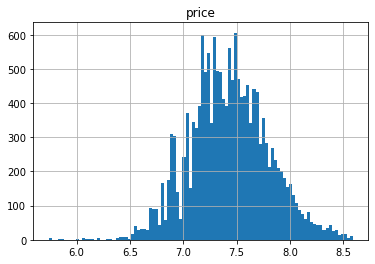

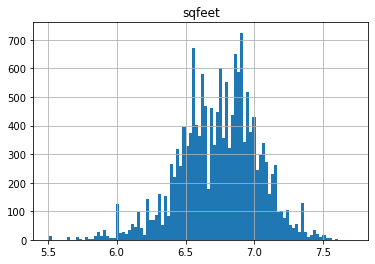

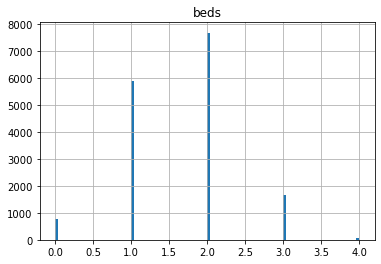

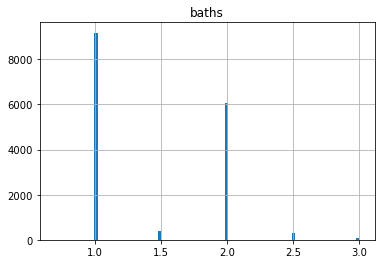

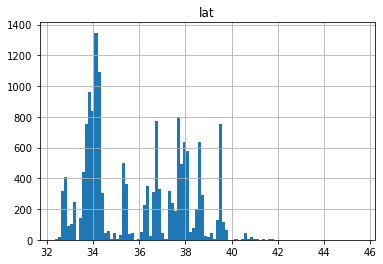

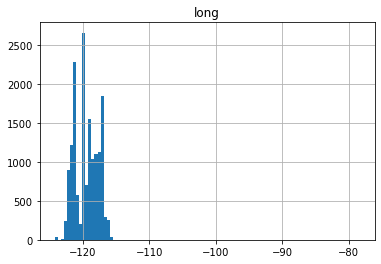

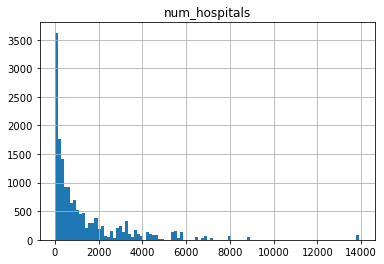

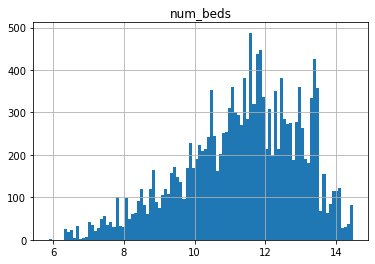

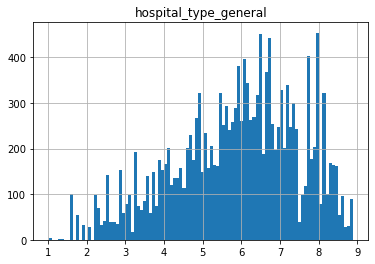

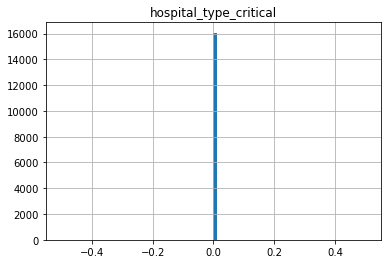

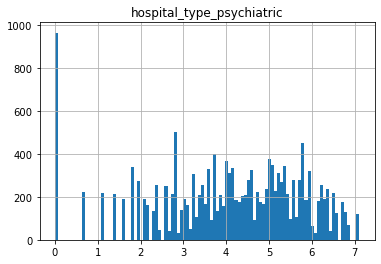

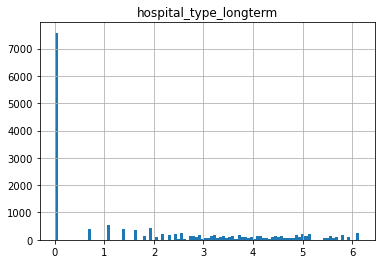

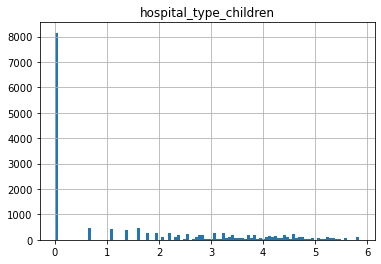

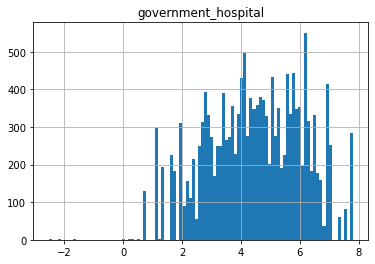

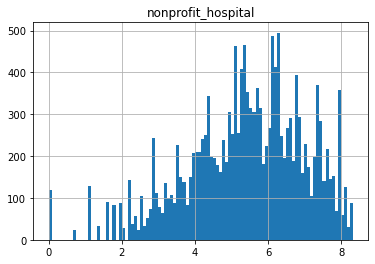

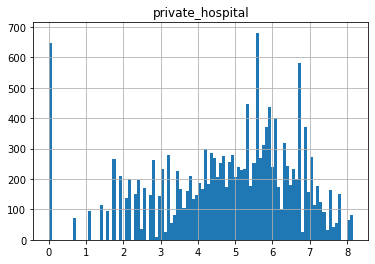

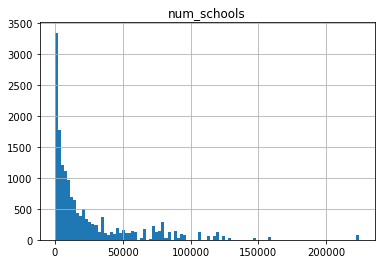

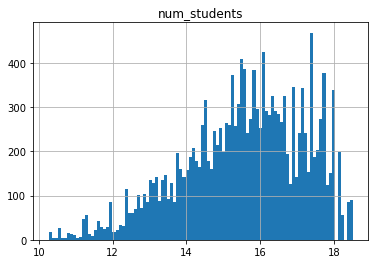

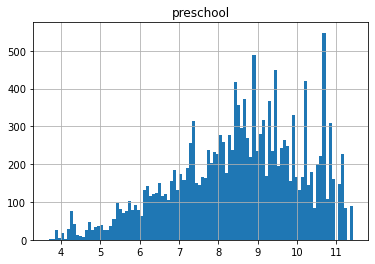

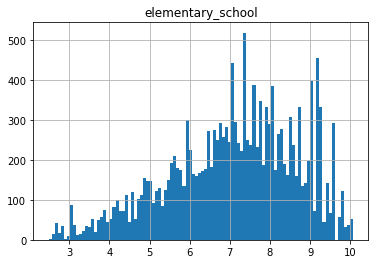

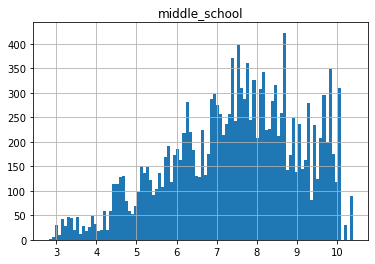

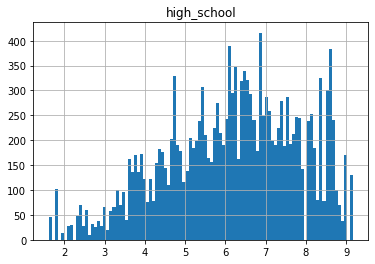

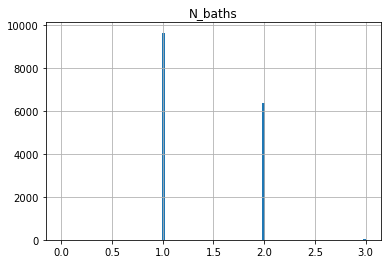

In [14]:
hist(df_train, bins=100)

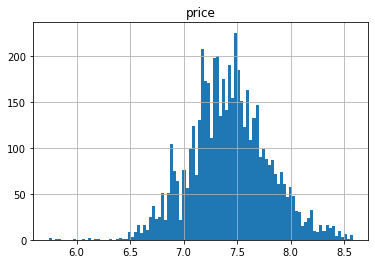

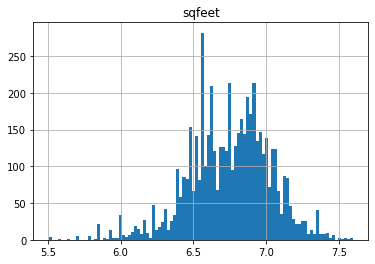

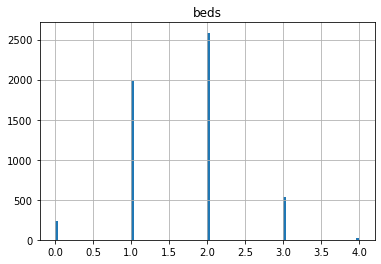

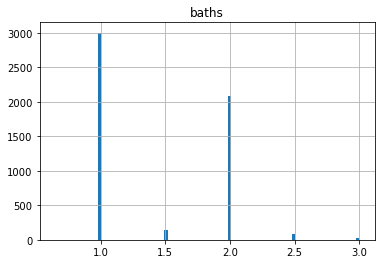

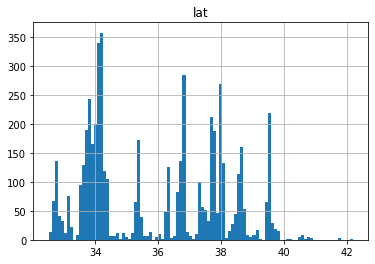

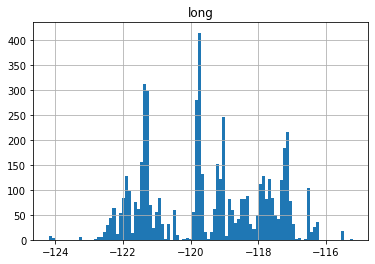

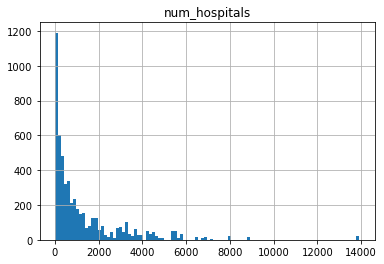

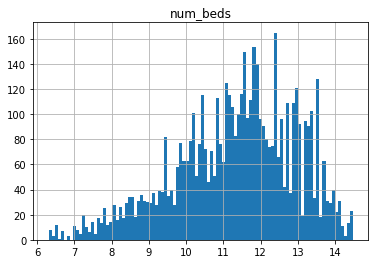

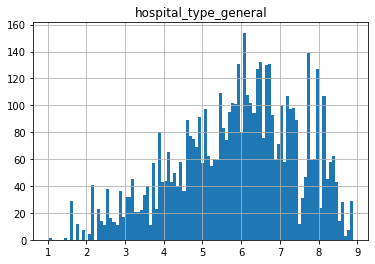

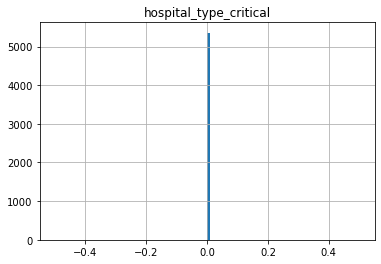

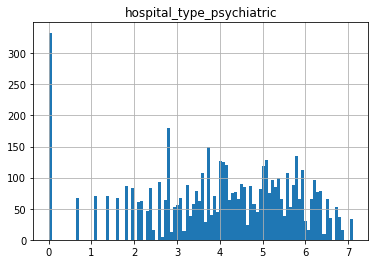

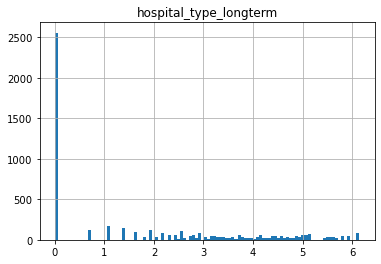

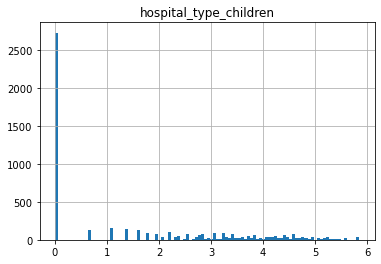

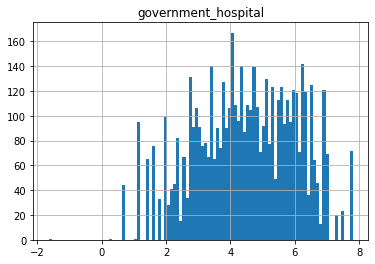

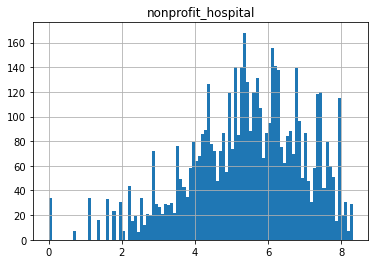

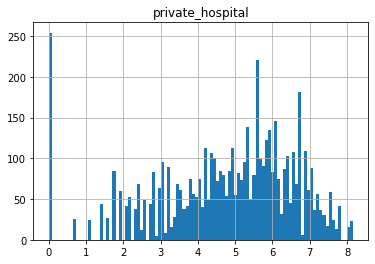

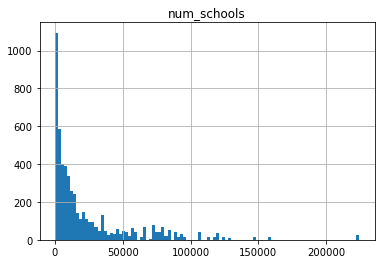

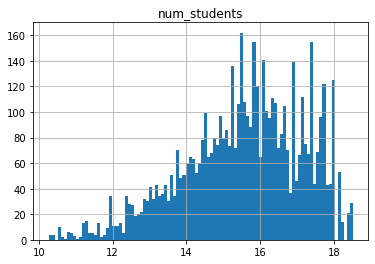

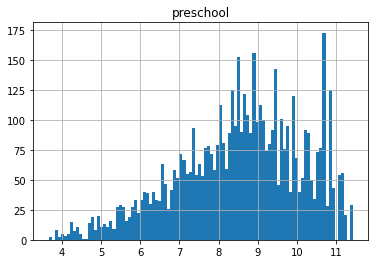

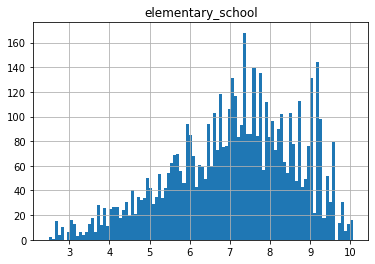

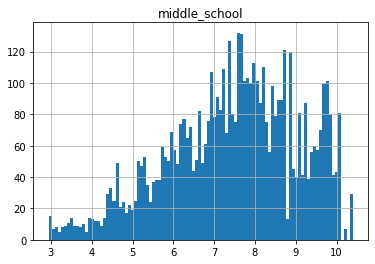

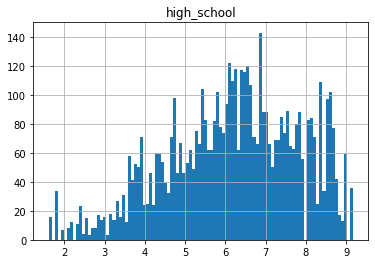

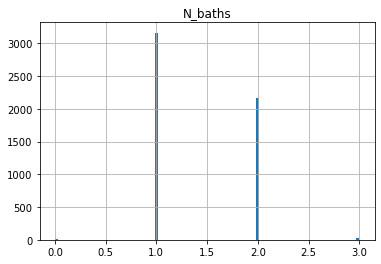

In [13]:
hist(df_val, bins=100)

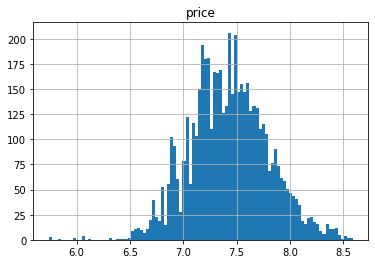

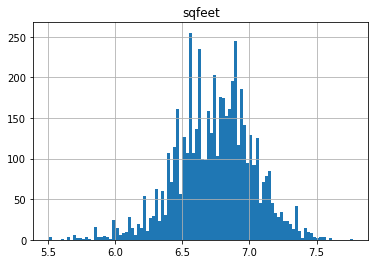

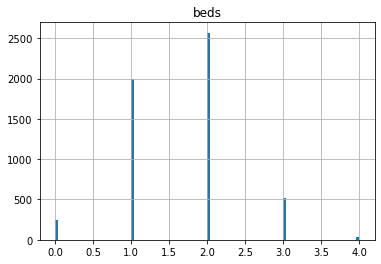

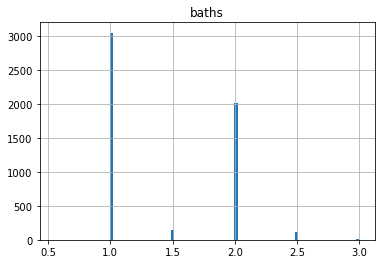

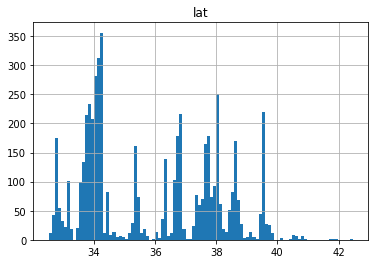

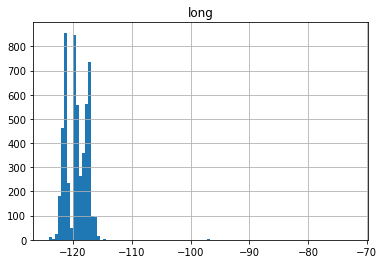

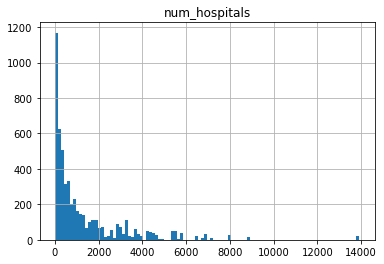

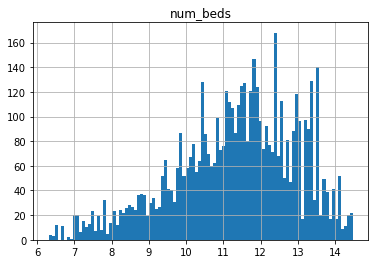

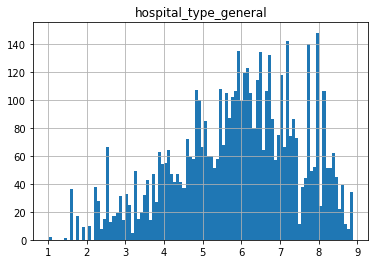

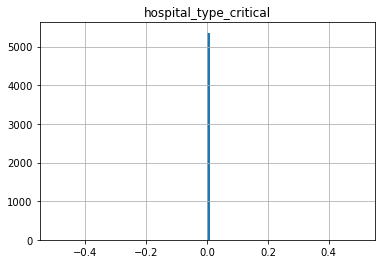

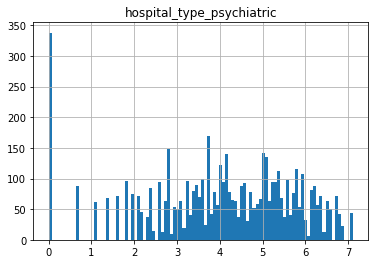

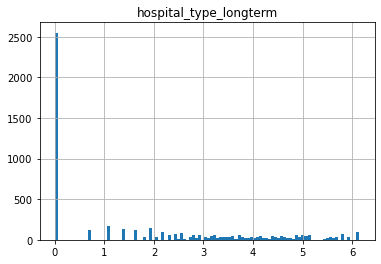

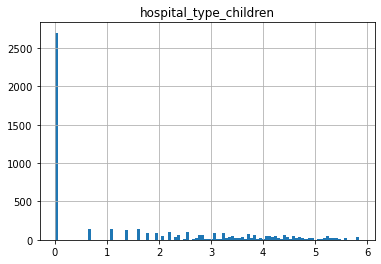

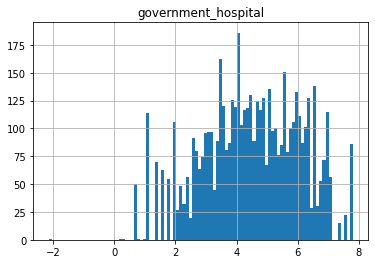

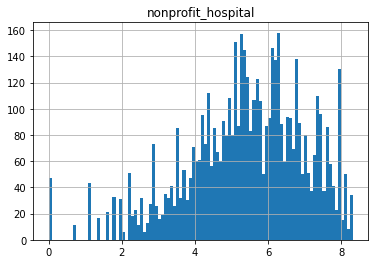

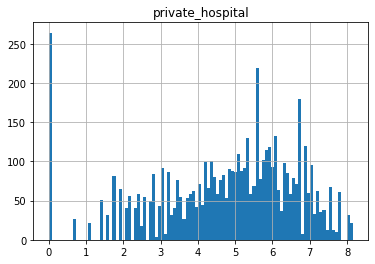

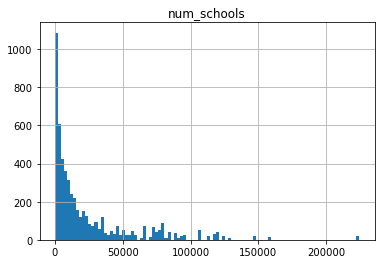

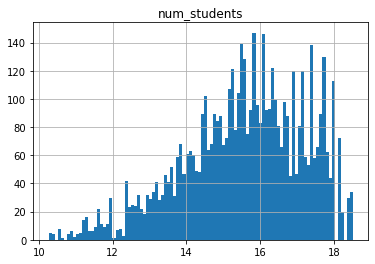

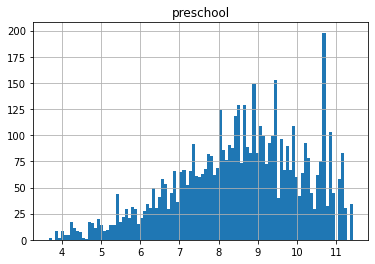

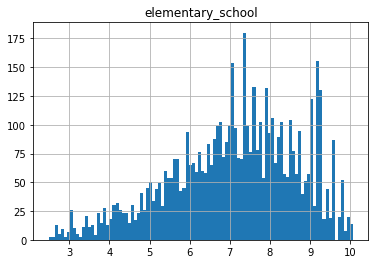

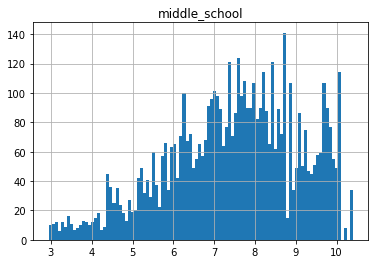

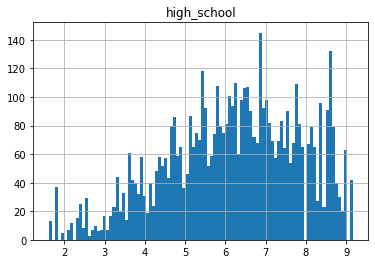

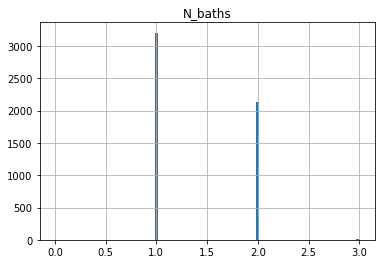

In [12]:
hist(df_test, bins=100)

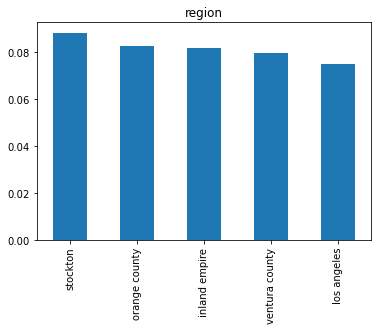

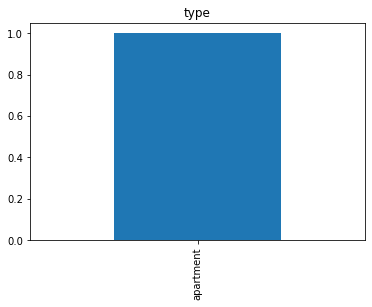

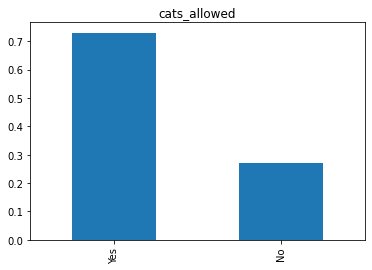

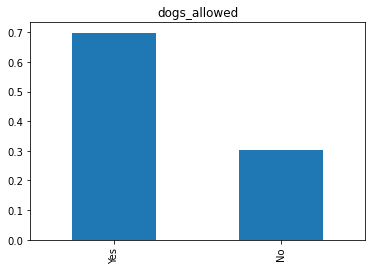

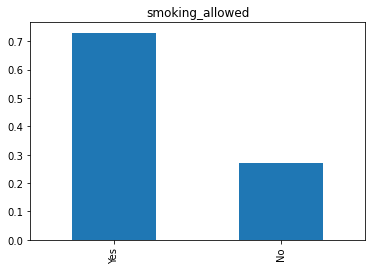

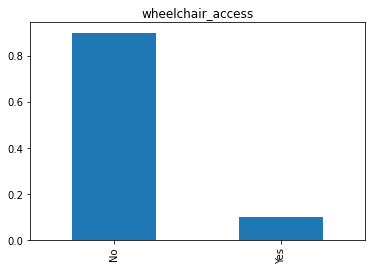

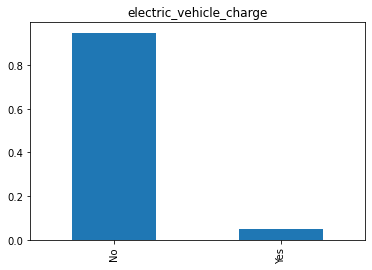

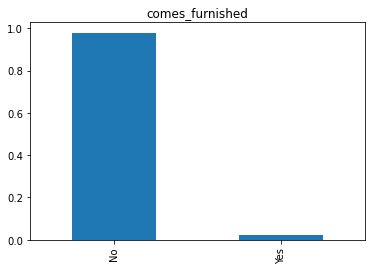

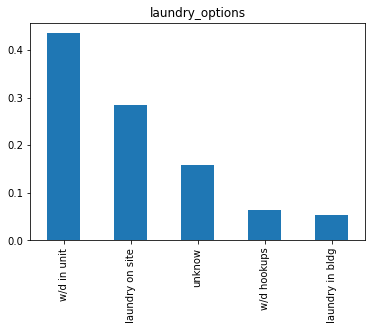

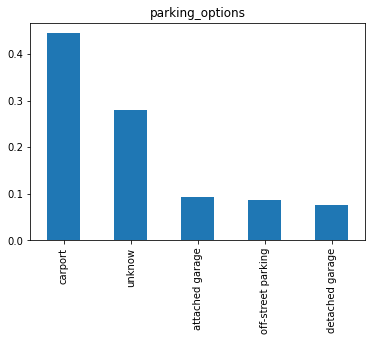

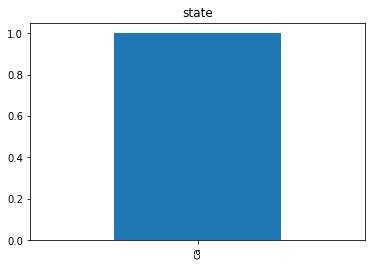

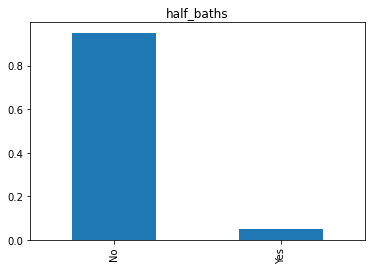

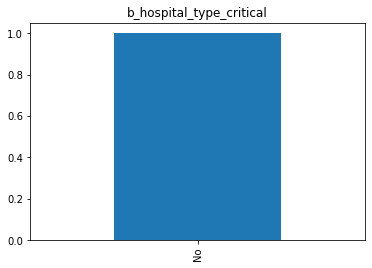

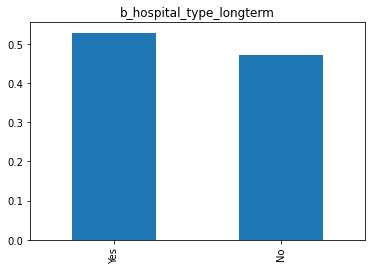

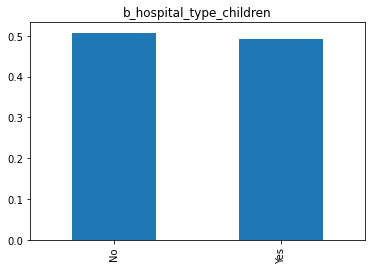

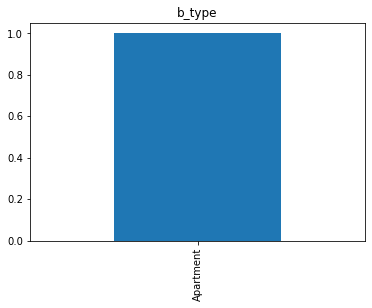

In [17]:
barplot(df_train,top=5,freq=True)

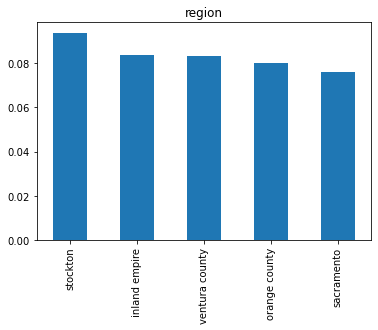

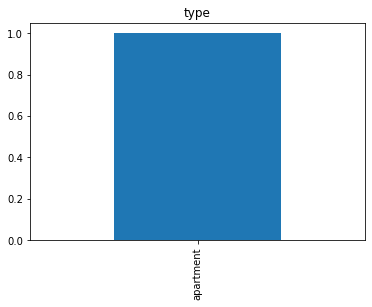

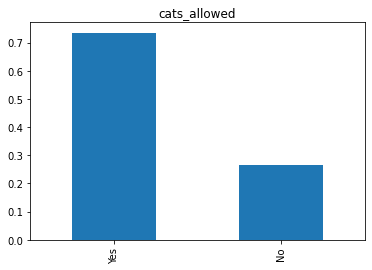

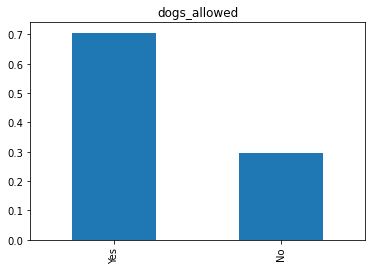

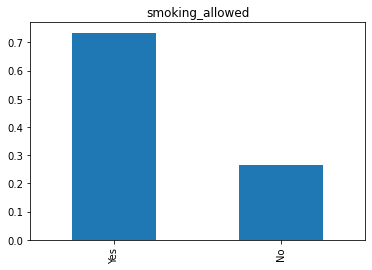

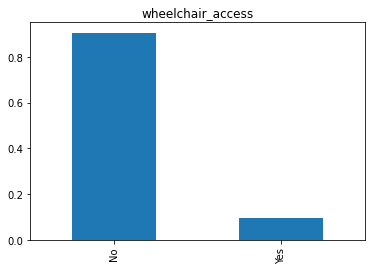

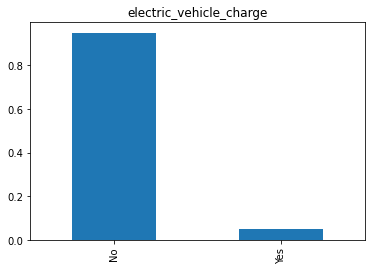

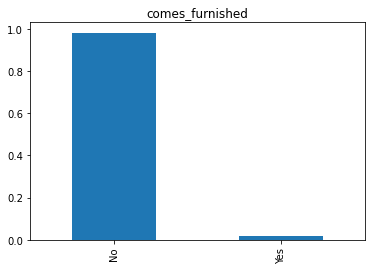

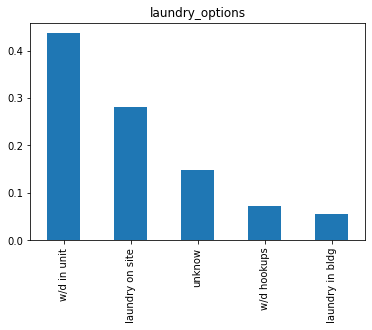

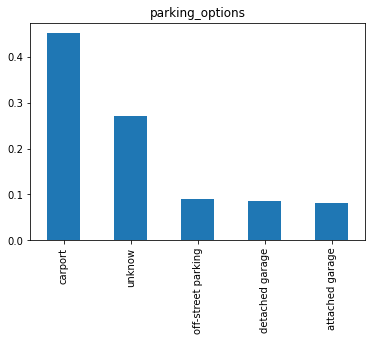

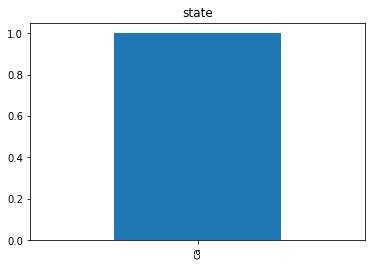

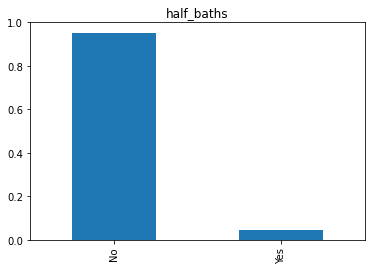

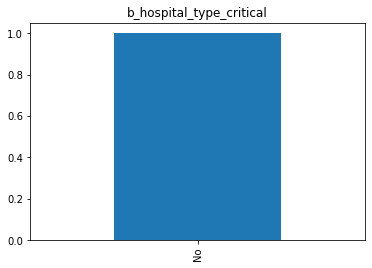

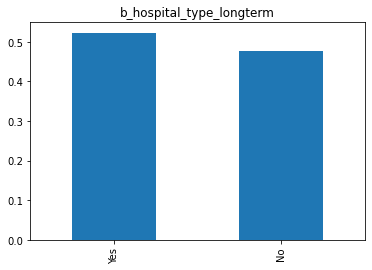

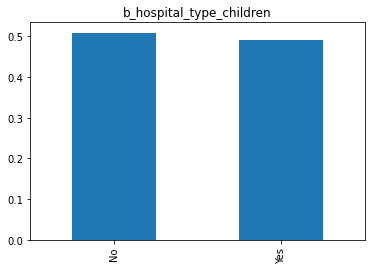

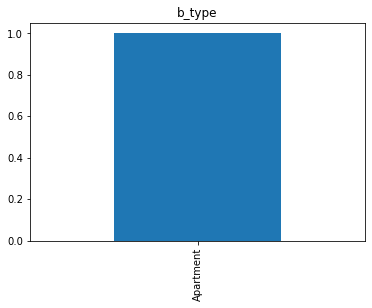

In [16]:
barplot(df_val,top=5,freq=True)

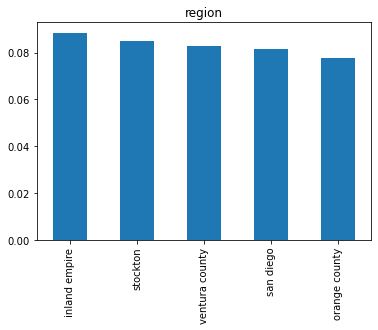

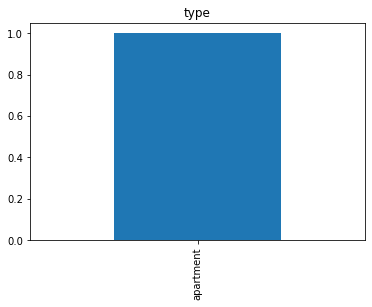

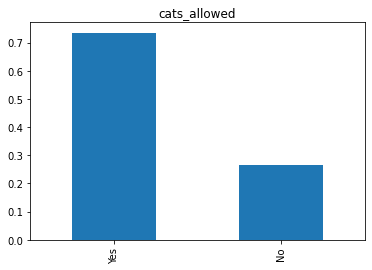

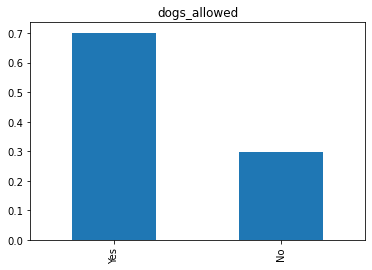

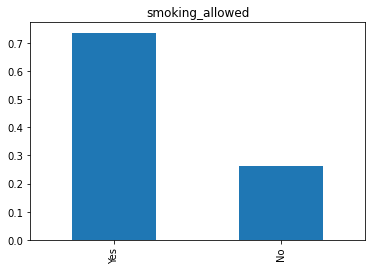

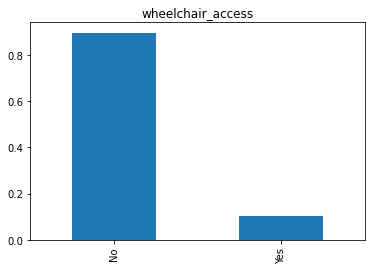

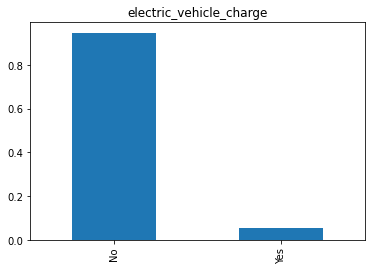

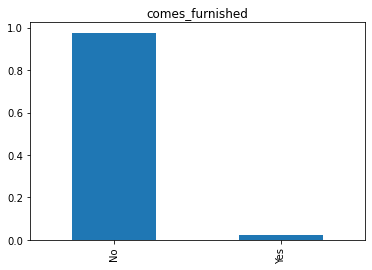

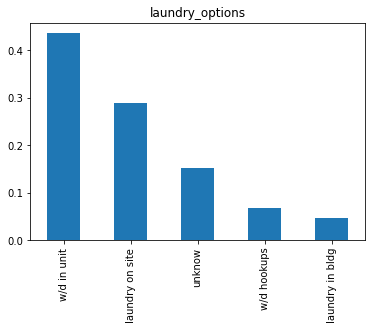

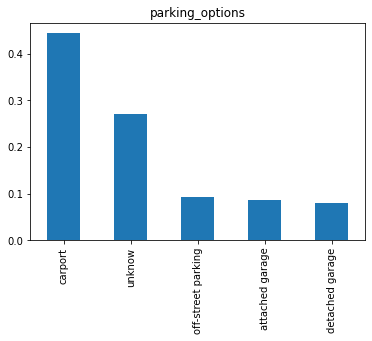

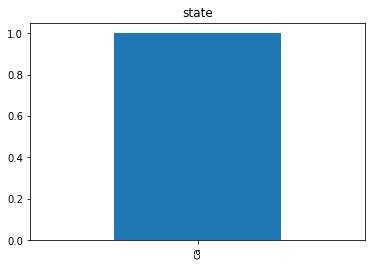

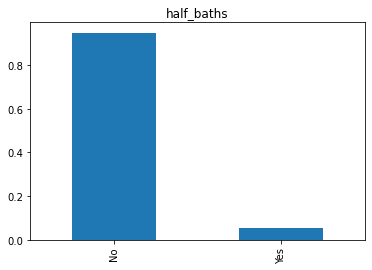

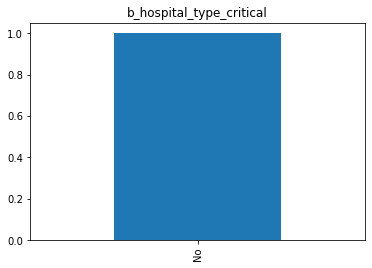

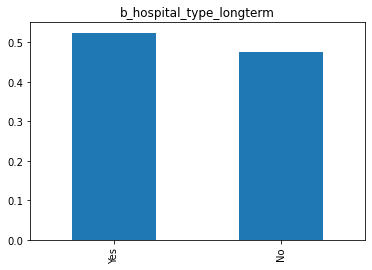

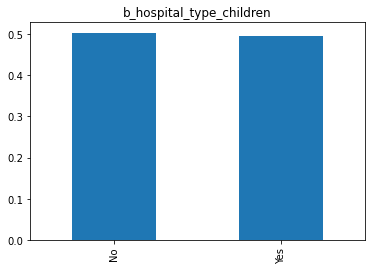

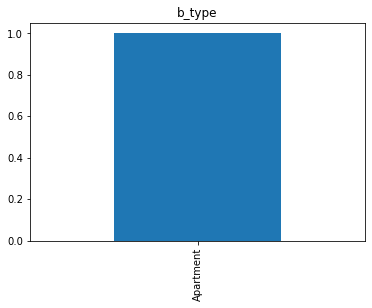

In [15]:
barplot(df_test,top=5,freq=True)